# Polytopic Hausdorff Distances

Here we provide our novel method to compute the polytopic Hausdorff distance between two polytopes.

In [1]:
import numpy as np
import pypolycontain as pp
import pydrake.solvers.mathematicalprogram as MP
import pydrake.solvers.gurobi as Gurobi_drake
# use Gurobi solver
global gurobi_solver, license
gurobi_solver=Gurobi_drake.GurobiSolver()
license = gurobi_solver.AcquireLicense()

In [2]:
np.random.seed(0)
q_x=20
H_x=np.random.random((q_x,2))-0.5
h_x=np.random.random((q_x,1))
X=pp.objects.H_polytope(H_x,h_x,color='red')
q_y=20
H_y=np.random.random((q_y,2))-0.5
h_y=np.random.random((q_y,1))
Y=pp.H_polytope(H_y,h_y,color='green')

In [8]:
prog=MP.MathematicalProgram()
eps=prog.NewContinuousVariables(1,"epsilon")
Ball=pp.objects.hyperbox(N=2).H_polytope
Ball.h=Ball.h*eps
Yp=pp.operations.minkowski_sum(Y,Ball)
prog.AddLinearCost(np.array([1]),np.array([0]),eps)
Theta,Lambda,Gamma,Beta=pp.containment.subset(prog,X,Yp,k=-1)
result=gurobi_solver.Solve(prog,None,None)
if result.is_success():
    eps_n=result.GetSolution(eps)
    print("Theta size was",Theta.shape)
    print("Hausdorff distance computation succesfull:",eps_n)
else:
    print("not sucessfull")

Theta size was (24, 24)
Hausdorff distance computation succesfull: [0.93556488]


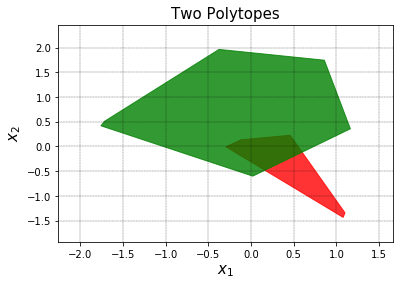

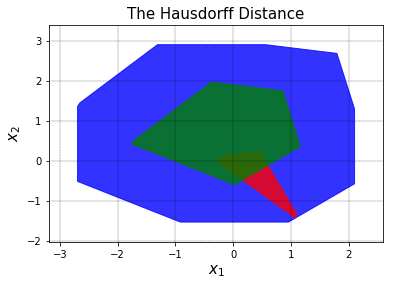

In [6]:
Ball=pp.objects.hyperbox(N=2).H_polytope
Ball.h=Ball.h*eps_n
Yp=pp.operations.minkowski_sum(Y,Ball)
Yp.color='blue'
pp.visualize([X,Y],alpha=0.8,title='Two Polytopes')
pp.visualize([Yp,X,Y],alpha=0.8,title='The Hausdorff Distance')

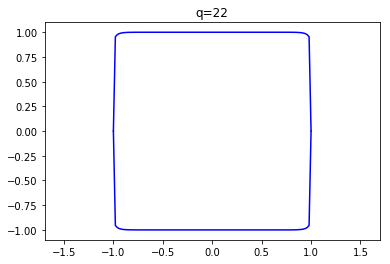

In [15]:
q=22
N=100
import matplotlib.pyplot as plt
for q in range(q,q+1):
    plt.figure()
    plt.plot(  [-1+2*i/N for i in range(N+1)],[(1-abs(-1+2*i/N)**q)**(1/q) for i in range(N+1)],'-',color='blue')
    plt.plot(  [-1+2*i/N for i in range(N+1)],[-(1-abs(-1+2*i/N)**q)**(1/q) for i in range(N+1)],'-',color='blue')
    plt.axis('equal')
    plt.title("q=%d"%q)

(-0.0009427248861856521+0.00034312379767357067j)